## Amazon Co-purchase Network Analysis
This notebook contains the code for analysing and plotting different data attributes.
##### Note: The location of data files given here local to our machine. We have submitted files separately. In order to execute this notebook you need to copy those files and provide their location in the required places

In [2]:
import csv
import networkx as nx
from operator import itemgetter
import community #This is the python-louvain package we installed.
import numpy as np
import matplotlib.pyplot as plt
import collections

##### Read the giant components GML of each graph 
The GMLs are submitted separately. Please replace their file path in the code accordingly.

In [3]:
G = nx.read_gml('C:/Sushmita/MS DataScience/NetworkScience/Project/Data/R files/Amazon0302/amazon0302_large.gml')

In [4]:
G_0505 = nx.read_gml('C:/Sushmita/MS DataScience/NetworkScience/Project/Data/R files/Amazon0505/amazon0505_large.gml')

In [5]:
G_0601 = nx.read_gml('C:/Sushmita/MS DataScience/NetworkScience/Project/Data/R files/Amazon0601/amazon0601_large.gml')

In [7]:
#This function creates the list of count for each graph to be plotted
def create_array_graph(G):
    my_dict = nx.get_node_attributes(G,'Group')
    c1 = 0
    c3 = 0
    v=0
    d=0
    for a, grp in my_dict.items():    # for name, age in list.items():  (for Python 3.x)
        if grp == 'Book':
            c1 = c1+1
        if grp == 'Music':
            c3 = c3+1
        if grp == 'Video':
            v = v+1
        if grp == 'DVD':
            d = d+1

    am_list = []
    am_list.append(c1)
    am_list.append(c3)
    am_list.append(v)
    am_list.append(d)
    return am_list

In [8]:
# Form list of count of each product category monthwise
am_march= create_array_graph(G)
am_may= create_array_graph(G_0505)
am_june= create_array_graph(G_0601)

#### An utility function to format the number count to make it legible.

In [10]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

#### Product count comparison
The variation in Product Count of each category is plotted below:

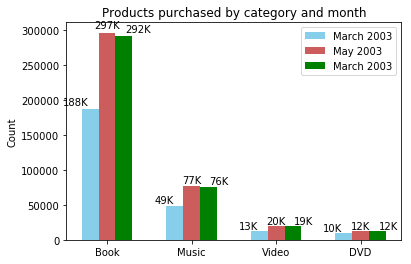

In [11]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(len(am_march))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, am_march, width, 
                color='SkyBlue', label='March 2003')
rects2 = ax.bar(ind , am_may, width, 
                color='IndianRed', label='May 2003')
rects3 = ax.bar(ind + width, am_june, width, 
                color='Green', label='March 2003')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Products purchased by category and month')
ax.set_xticks(ind)
ax.set_xticklabels(('Book', 'Music', 'Video', 'DVD'))
ax.legend()

# Creates the bar plots
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
               human_format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "center")
autolabel(rects3, "right")

plt.show()

#### Calculate and plot degree centralities of graphs

In [6]:
# Degree centrality
dc = nx.degree_centrality(G)

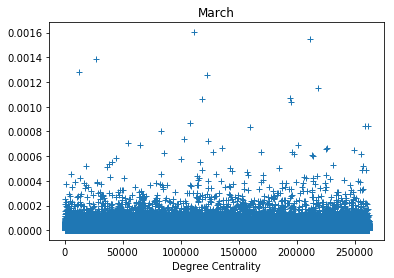

In [15]:
# Plot degree-centrality 
xdata = list(dc.values())
plt.plot(xdata, '+')
plt.xlabel('Degree Centrality')
plt.title('March')
plt.show()

In [17]:
# Degree centrality
dc1 = nx.degree_centrality(G_0505)
# Degree centrality
dc2 = nx.degree_centrality(G_0601)

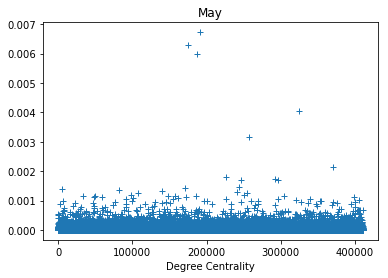

In [18]:
# Plot degree-centrality 
xdata = list(dc1.values())
plt.plot(xdata, '+')
plt.xlabel('Degree Centrality')
plt.title('May')
plt.show()

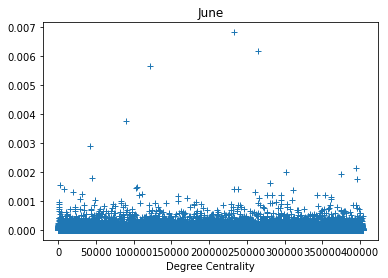

In [19]:
# Plot degree-centrality 
xdata = list(dc2.values())
plt.plot(xdata, '+')
plt.xlabel('Degree Centrality')
plt.title('June')
plt.show()

#### Study the variation in reviews count
Store the reviews count in list and plot them against each product.

In [13]:
dict_0302 = nx.get_node_attributes(G,'Reviews')
dict_0505 = nx.get_node_attributes(G_0505,'Reviews')
dict_0601 = nx.get_node_attributes(G_0601,'Reviews')
a_0302 =[]
a_0505 =[]
a_0601 =[]
for a, grp in dict_0302.items():
    a_0302.append(int(grp))
for a, grp in dict_0505.items():
    a_0505.append(int(grp))
for a, grp in dict_0601.items():
    a_0601.append(int(grp))

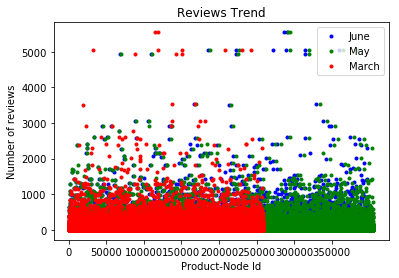

In [14]:
# Make a figure
fig = plt.figure()
# The axes for your lists 1-3
ax1 = fig.add_subplot(111)
# Plot lines 1-3

line3 = ax1.plot(range(0,len(a_0601)), a_0601,"b.",label='June')
line2 = ax1.plot(range(0,len(a_0505)), a_0505,'g.',label='May')
line1 = ax1.plot(range(0,len(a_0302)), a_0302,"r.",label='March')

plt.xticks(np.arange(0, len(a_0601), 50000.0))
ax1.set_xlabel("Product-Node Id")
ax1.set_ylabel("Number of reviews")
plt.title("Reviews Trend")
plt.legend()
plt.show()

